## Random Walks


## Simulating a random walk in 1D

This is a simple Python code which perfoms the simulation of a random walk. The code assumes that the step length is $l=1$.

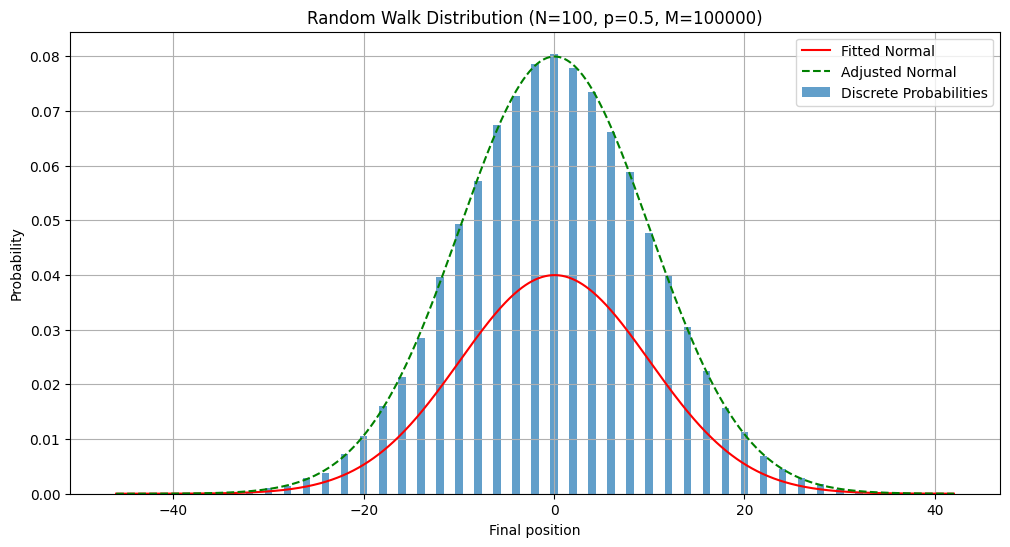

Fitted mu: 0.0553
Expected mu: 0.0000
Fitted sigma: 9.9822
Expected sigma: 10.0000


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def run_simulation(M, N, p, seed):
    rng = np.random.default_rng(seed)
    steps = 2 * (rng.random((M, N)) < p).astype(int) - 1
    return np.sum(steps, axis=1)

# Parameters
M = 100000
N = 100
p = 0.5

final_positions = run_simulation(M, N, p, seed=42)

# Calculate discrete probabilities
unique, counts = np.unique(final_positions, return_counts=True)
discrete_probs = counts / M

# Fit normal distribution
mu, sigma = norm.fit(final_positions)

# Plot
plt.figure(figsize=(12, 6))

# Discrete probabilities
plt.bar(unique, discrete_probs, alpha=0.7, label='Discrete Probabilities')

# Continuous approximation
x = np.linspace(min(final_positions), max(final_positions), 1000)
plt.plot(x, norm.pdf(x, mu, sigma), 'r-', label='Fitted Normal')

# Adjusted continuous curve
adjusted_normal = norm.pdf(x, mu, sigma) * 2  # Multiply by 2 to match peak heights of the discrete distribution
plt.plot(x, adjusted_normal, 'g--', label='Adjusted Normal')

plt.xlabel('Final position')
plt.ylabel('Probability')
plt.title(f'Random Walk Distribution (N={N}, p={p}, M={M})')
plt.legend()
plt.grid(True)
plt.show()

print(f"Fitted mu: {mu:.4f}")
print(f"Expected mu: {N * (2 * p - 1):.4f}")
print(f"Fitted sigma: {sigma:.4f}")
print(f"Expected sigma: {np.sqrt(N):.4f}")


# Correlated Random Walk: Theoretical Considerations

## Introduction

Now we explore the correlated random walk model, a variation of the classic random walk. By introducing a dependency between consecutive steps, we can examine how short-term memory or inertia influences the system's overall behavior. This model offers insights into various fields, including physics and finance, where the effects of correlation can have significant impacts.

## Model Description

In the correlated random walk model, a walker starts at the origin, $ x = 0 $. At each step, the walker moves either right (+1) or left (-1). However, unlike in a classic random walk, the probability of moving right is influenced by the direction of the previous step. If the previous step was to the right, the probability of moving right increases by $ \delta $. Conversely, if the previous step was to the left, the probability of moving right decreases by $ \delta $. Here, $ \delta $ represents the strength of the correlation between steps, reflecting the degree of persistence or reversal in the walker's movement.

## Theoretical Expectations

When there is no correlation ($ \delta = 0 $), the model behaves as a classic random walk. For a large number of steps ($ N $), the final positions of the walkers are expected to approximate a normal distribution due to the Central Limit Theorem. The mean final position should be close to zero, and the standard deviation of the final positions should be proportional to $ \sqrt{N} $, indicating how widely the walkers are expected to spread out over time.

When introducing correlation ($ \delta > 0 $), the walk is modified in several ways. The distribution of final positions will still be approximately normal for a large number of steps, but the mean final position should remain close to zero if the starting conditions are symmetric. However, the standard deviation of the final positions will increase compared to the uncorrelated case, reflecting the increased persistence in the walker's movements. This means that walkers are more likely to continue moving in the same direction, leading to a broader spread of final positions.

## Expected Plot Characteristics

When plotting the distributions for different values of $ \delta $, all distributions should be centered around zero. As $ \delta $ increases, the distributions will become wider, indicating a larger standard deviation. The peaks of the distributions will become lower to maintain the same total area under the curve. The uncorrelated case ($ \delta = 0 $) will exhibit the narrowest distribution, while stronger correlations (larger $ \delta $) will result in fatter tails, representing a higher probability of extreme outcomes.

## Theoretical Implications

The introduction of correlation in the random walk model has several intriguing implications. Positive correlation ($ \delta > 0 $) introduces a tendency for the walker to continue in the same direction, mimicking inertia or momentum observed in physical systems. This leads to an increased rate of diffusion, as the walkers spread out more quickly. Additionally, stronger correlations increase the likelihood of reaching positions far from the origin, modeling phenomena where small biases can lead to significant long-term effects. 


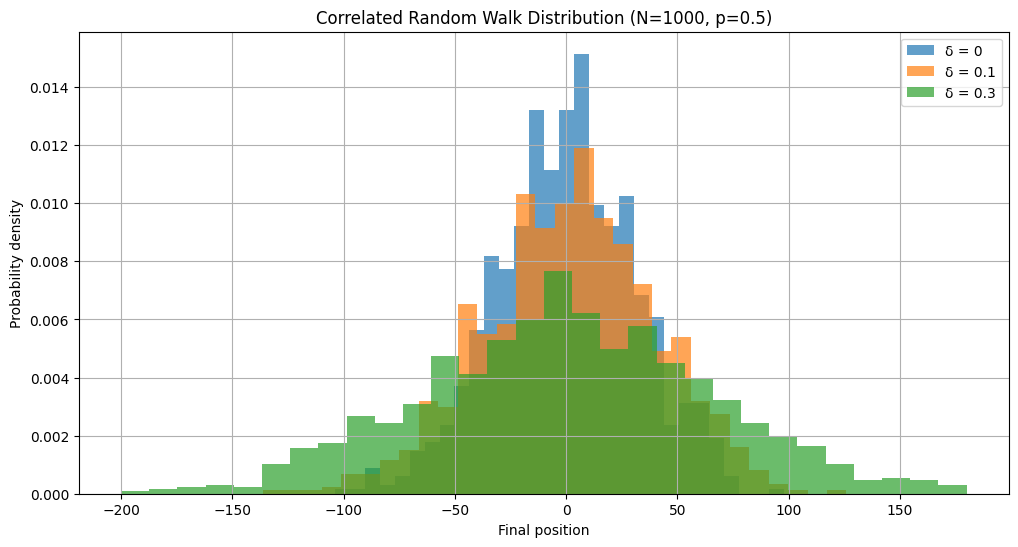

δ = 0:
  Mean: 0.3400
  Std Dev: 31.0720
δ = 0.1:
  Mean: 1.5820
  Std Dev: 38.5232
δ = 0.3:
  Mean: -0.3340
  Std Dev: 64.5235


In [2]:
#@title Random Walk with step correlation
import numpy as np
import matplotlib.pyplot as plt

def correlated_random_walk(N, p, delta, M=1000):
    rng = np.random.default_rng(12345)
    final_positions = np.zeros(M)
    
    for i in range(M):
        x = 0
        prev_step = 0
        for _ in range(N):
            if prev_step == 1:
                p_right = min(1, max(0, p + delta))
            elif prev_step == -1:
                p_right = min(1, max(0, p - delta))
            else:
                p_right = p
            
            step = 1 if rng.random() < p_right else -1
            x += step
            prev_step = step
        
        final_positions[i] = x
    
    return final_positions

# Parameters
N = 1000  # Number of steps
p = 0.5   # Base probability of moving right
deltas = [0, 0.1, 0.3]  # Correlation strengths

plt.figure(figsize=(12, 6))

for delta in deltas:
    final_positions = correlated_random_walk(N, p, delta)
    plt.hist(final_positions, bins=30, density=True, alpha=0.7, label=f'δ = {delta}')

plt.xlabel('Final position')
plt.ylabel('Probability density')
plt.title(f'Correlated Random Walk Distribution (N={N}, p={p})')
plt.legend()
plt.grid(True)
plt.show()

for delta in deltas:
    final_positions = correlated_random_walk(N, p, delta)
    print(f"δ = {delta}:")
    print(f"  Mean: {np.mean(final_positions):.4f}")
    print(f"  Std Dev: {np.std(final_positions):.4f}")

# Random Walks with Boundary Conditions: Theoretical Insights

## Introduction

This study examines random walks under various boundary conditions to model systems with spatial constraints or periodic structures. These models offer insights into physical and biological phenomena, from molecular diffusion to animal foraging behavior. By analyzing how boundary conditions affect random walks, we can better understand systems with physical limitations.

## Types of Boundary Conditions

We consider three main types of boundary conditions:

1. **No Boundary**: The classic random walk in unlimited space.
2. **Wall Boundary**: The walker is confined within a specific range, reflecting back when it reaches the boundary.
3. **Periodic Boundary**: The walker moves on a circular path, reappearing at the opposite edge when crossing a boundary.

## Theoretical Expectations

### No Boundary Condition

- Position distribution approaches normal as steps increase (Central Limit Theorem).
- Mean position stays near the starting point zero.
- Standard deviation grows proportionally to √N (N = number of steps).

### Wall Boundary Condition

- Non-Gaussian position distribution with peaks near boundaries.
- Mean position tends toward the center of the allowed range.
- Standard deviation is limited by the boundary range.

### Periodic Boundary Condition

- Position distribution becomes uniform over the entire range for large step counts.
- Mean position is less meaningful due to circular nature.
- Standard deviation is limited by the boundary range, similar to the wall boundary condition.

## Expected Plot Characteristics

1. Final Position Histograms:
   - No Boundary: Bell-shaped, centered at zero.
   - Wall Boundary: Flattened with increased density near walls.
   - Periodic Boundary: More uniform distribution.

2. Example Trajectories:
   - No Boundary: Unrestricted movement, potentially covering large distances.
   - Wall Boundary: Reflections at boundaries, showing confinement.
   - Periodic Boundary: Continuous loop with wraparound at edges.

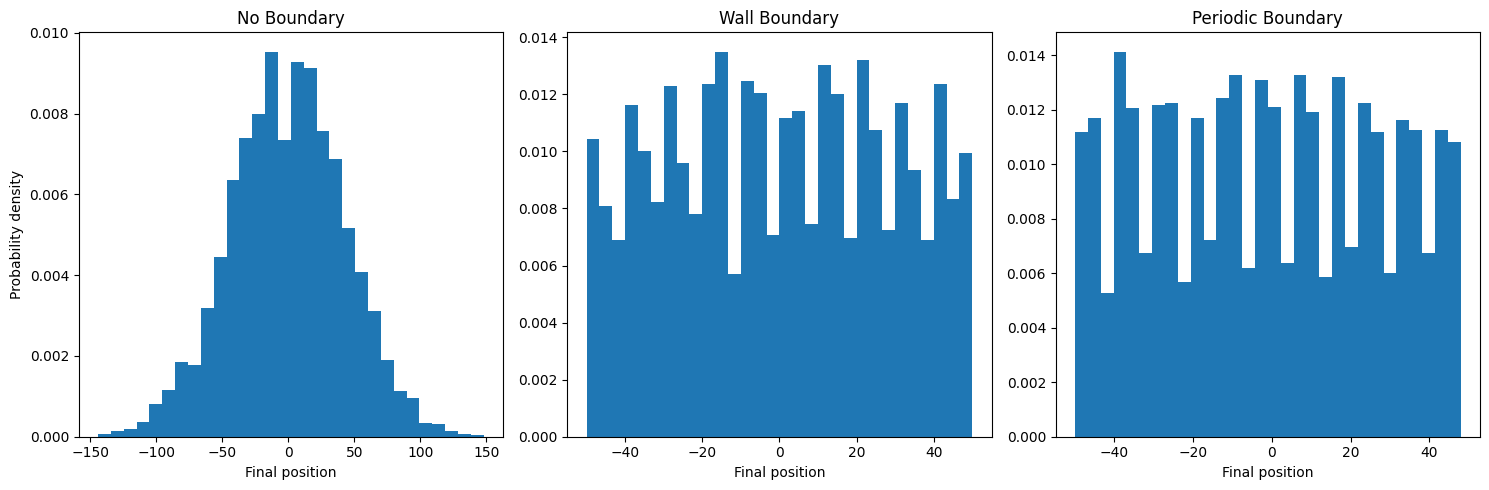

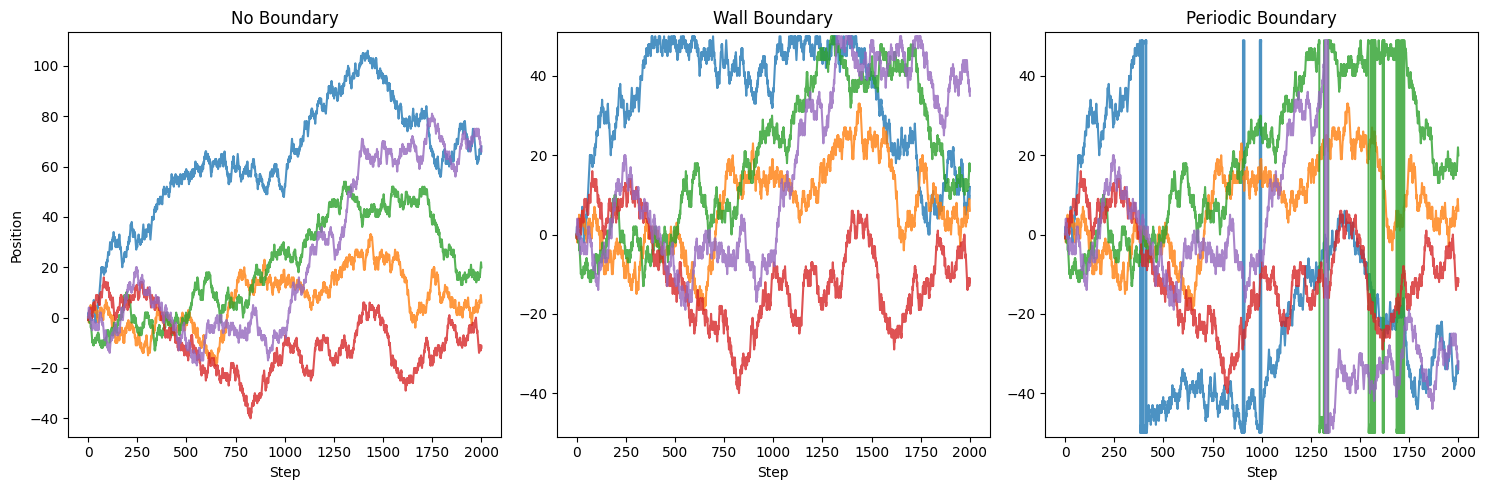

In [12]:
#@title Random Walk with Boundary Conditions
import numpy as np
import matplotlib.pyplot as plt

def random_walk_with_boundaries(N, p, boundary_type, boundary_range, M=5000):
    rng = np.random.default_rng(12345)
    trajectories = np.zeros((M, N+1))
    
    for i in range(M):
        x = 0
        for j in range(1, N+1):
            step = 1 if rng.random() < p else -1
            x += step
            
            if boundary_type == 'wall':
                x = min(max(x, -boundary_range), boundary_range)
            elif boundary_type == 'periodic':
                x = (x + boundary_range) % (2 * boundary_range) - boundary_range
            
            trajectories[i, j] = x
    
    return trajectories

# Parameters
N = 2000  # Number of steps
p = 0.5   # Probability of moving right
boundary_range = 50
M = 100

# Simulate random walks with different boundary conditions
no_boundary = random_walk_with_boundaries(N, p, 'none', np.inf)
wall_boundary = random_walk_with_boundaries(N, p, 'wall', boundary_range)
periodic_boundary = random_walk_with_boundaries(N, p, 'periodic', boundary_range)

# Plot results
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.hist(no_boundary[:, -1], bins=30, density=True)
plt.title('No Boundary')
plt.xlabel('Final position')
plt.ylabel('Probability density')

plt.subplot(132)
plt.hist(wall_boundary[:, -1], bins=30, density=True)
plt.title('Wall Boundary')
plt.xlabel('Final position')

plt.subplot(133)
plt.hist(periodic_boundary[:, -1], bins=30, density=True)
plt.title('Periodic Boundary')
plt.xlabel('Final position')

plt.tight_layout()
plt.show()

# Plot example trajectories
plt.figure(figsize=(15, 5))

plt.subplot(131)
for i in range(5):
    plt.plot(no_boundary[i], alpha=0.8)
plt.title('No Boundary')
plt.xlabel('Step')
plt.ylabel('Position')

plt.subplot(132)
for i in range(5):
    plt.plot(wall_boundary[i], alpha=0.8)
plt.title('Wall Boundary')
plt.xlabel('Step')
plt.ylim(-boundary_range-1, boundary_range+1)

plt.subplot(133)
for i in range(5):
    plt.plot(periodic_boundary[i], alpha=0.8)
plt.title('Periodic Boundary')
plt.xlabel('Step')
plt.ylim(-boundary_range-1, boundary_range+1)

plt.tight_layout()
plt.show()


# Random Walks in 2D and 3D: A Visual Exploration

## Expected Plots

In the 2D random walk plot, we expect to see multiple paths originating from the point (0,0). As the walkers take random steps, their paths should spread out in all directions, forming a roughly circular pattern around the origin. This dispersion illustrates the inherent randomness of the process. Some paths may wander far from the origin, while others stay closer, highlighting the variability in the walker's journeys.

In the 3D random walk plot, the paths will spread out in three dimensions. This creates a shape that resembles a sphere centered at the origin. The additional dimension in 3D means the paths may appear less dense than in the 2D plot, but the fundamental behavior remains consistent. The walkers explore space more freely, with their movements filling the volume rather than just an area.



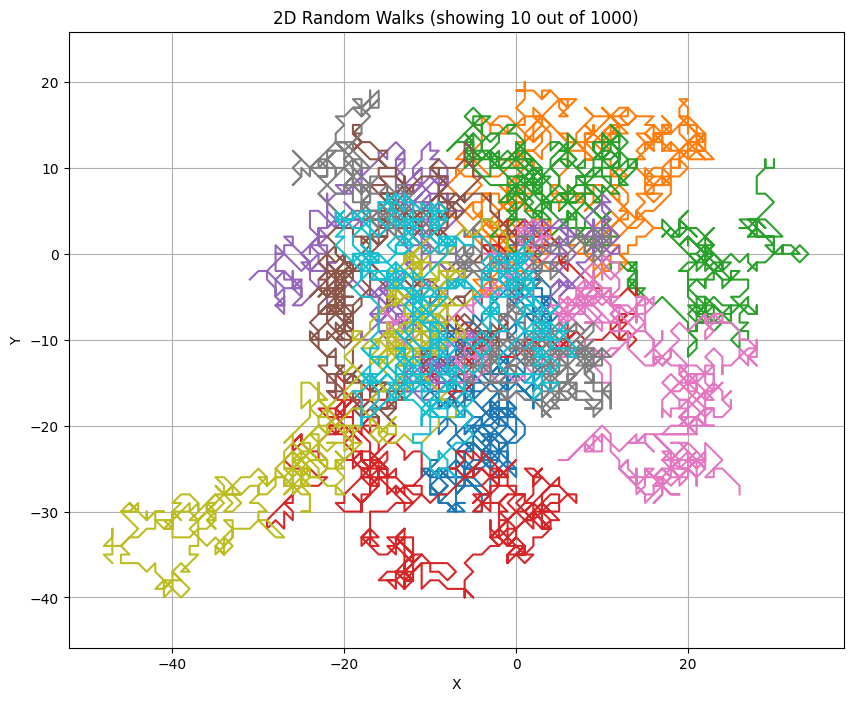

2D Random Walk Analysis:
Mean final position: [ 0.579 -2.013]
Standard deviation of final positions: [25.83117804 26.07970151]
Mean distance from origin: 32.45735141880024
Standard deviation of distances: 17.27160498843422




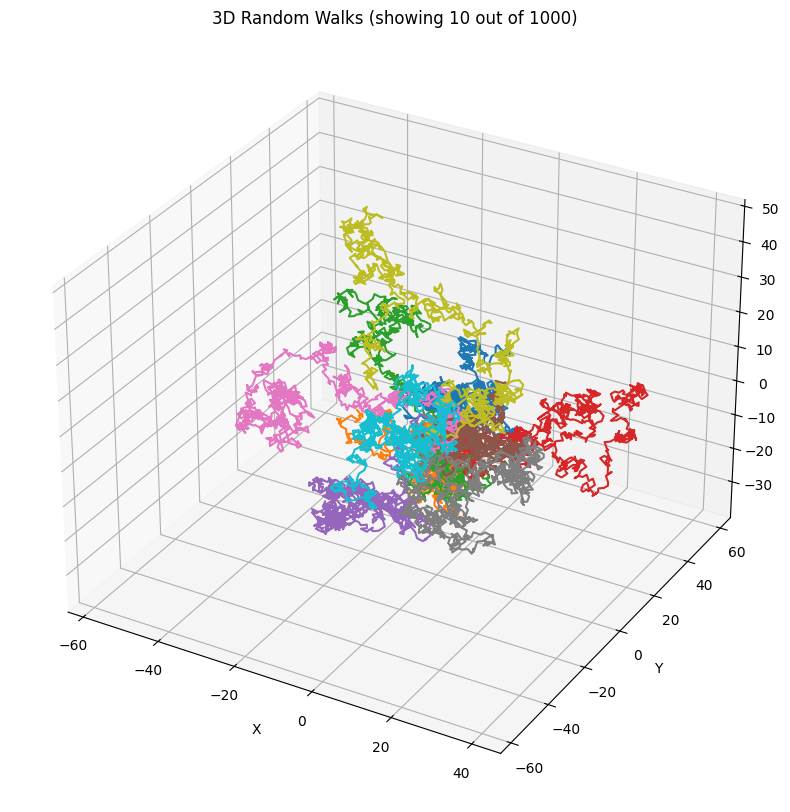

3D Random Walk Analysis:
Mean final position: [-1.313  0.09  -0.951]
Standard deviation of final positions: [26.24158972 25.65618639 25.49934507]
Mean distance from origin: 41.24138215367648
Standard deviation of distances: 17.287637144919927


In [5]:
#@ 3-D Random Walk
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def random_walk_nd(n_steps, n_walkers, dimensions=2):
    """
    Perform a random walk in 2D or 3D.
    
    Parameters:
    - n_steps: Number of steps for each walker
    - n_walkers: Number of walkers to simulate
    - dimensions: 2 for 2D, 3 for 3D
    
    Returns:
    - An array of shape (n_walkers, dimensions, n_steps+1) containing the positions at each step
    """
    # Initialize the walks
    walks = np.zeros((n_walkers, dimensions, n_steps+1))
    
    # Generate random steps: -1, 0, or 1 in each dimension
    steps = np.random.randint(-1, 2, size=(n_walkers, dimensions, n_steps))
    
    # Cumulative sum to get the walk positions
    walks[:, :, 1:] = np.cumsum(steps, axis=2)
    
    return walks

def plot_2d_walks(walks, max_plots=10):
    """Plot 2D random walks"""
    plt.figure(figsize=(10, 8))
    for walk in walks[:max_plots]:
        plt.plot(walk[0], walk[1])
    plt.title(f'2D Random Walks (showing {min(max_plots, len(walks))} out of {len(walks)})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.axis('equal')
    plt.show()

def plot_3d_walks(walks, max_plots=10):
    """Plot 3D random walks"""
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    for walk in walks[:max_plots]:
        ax.plot(walk[0], walk[1], walk[2])
    ax.set_title(f'3D Random Walks (showing {min(max_plots, len(walks))} out of {len(walks)})')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

def analyze_walks(walks):
    """Analyze the final positions of the walks"""
    final_positions = walks[:, :, -1]
    mean_position = np.mean(final_positions, axis=0)
    std_position = np.std(final_positions, axis=0)
    
    print(f"Mean final position: {mean_position}")
    print(f"Standard deviation of final positions: {std_position}")
    
    # Calculate distance from origin for each walk
    distances = np.linalg.norm(final_positions, axis=1)
    mean_distance = np.mean(distances)
    std_distance = np.std(distances)
    
    print(f"Mean distance from origin: {mean_distance}")
    print(f"Standard deviation of distances: {std_distance}")

# Simulation parameters
n_steps = 1000
n_walkers = 1000

# 2D Random Walk
walks_2d = random_walk_nd(n_steps, n_walkers, dimensions=2)
plot_2d_walks(walks_2d)
print("2D Random Walk Analysis:")
analyze_walks(walks_2d)

print("\n" + "="*50 + "\n")

# 3D Random Walk
walks_3d = random_walk_nd(n_steps, n_walkers, dimensions=3)
plot_3d_walks(walks_3d)
print("3D Random Walk Analysis:")
analyze_walks(walks_3d)

# Practical Applications of Correlated Random Walks



### Polymer Chains

Polymer chains can be effectively modeled using positively correlated random walks. Each step represents a monomer in the chain, with positive correlation reflecting the tendency of adjacent monomers to align due to chemical bonds and intermolecular forces. This results in walks that are more extended and less coiled compared to uncorrelated random walks, capturing the intrinsic stiffness or persistence length of the polymer chain.

### Particles in a Glassy Medium

Particles diffusing in a glassy medium can be modeled using negatively correlated random walks or a modified random walk with "cages." The negative correlation or caging effect represents the tendency of particles to be trapped in local energy minima formed by surrounding particles. These walks exhibit periods of confined motion within cages, interspersed with larger jumps when the particle escapes a cage, reflecting the complex dynamics of particles in glassy materials.

## Implementation Details

The provided code implements these concepts through two main functions. The `correlated_random_walk` function generates a correlated random walk in one, two, or three dimensions, with the correlation parameter adjusting the probability of continuing in the same direction. The `simulate_glassy_medium` function simulates a particle in a glassy medium using a cage model, where the cage size determines the size of confinement regions, and the escape probability is the likelihood of the particle escaping its current cage.

## Expected Results

### Polymer Chains (Positive Correlation)

Walks should appear more stretched out and less coiled, reflecting the alignment of monomers. The Mean Square Displacement (MSD) should increase more rapidly than in an uncorrelated walk, indicating faster diffusion due to the persistent motion.

### Particles in a Glassy Medium (Negative Correlation)

Walks should appear more confined with frequent direction changes, reflecting the caging effect. The MSD should increase more slowly than in an uncorrelated walk, indicating slower diffusion due to the frequent reversals in direction.

### Glassy Medium with Cages

Walks should display step-like patterns, with periods of confined motion followed by sudden jumps. The MSD should show a characteristic plateau at intermediate timescales, followed by a transition to normal diffusion at longer timescales, capturing the dynamics of particles transitioning between confined and free motion.

## Interpretation of Plots

The code generates four types of plots to visualize these phenomena. For polymer chains, the paths should appear extended and less tangled. For particles in a glassy medium, the paths should show more confined, back-and-forth motion. For particles in a glassy medium with cages, the paths should show step-like patterns in one dimension. The MSD plots should reveal faster-than-linear growth for polymer chains, slower growth for particles in a glassy medium, and a plateau followed by linear growth for particles in a glassy medium with cages.



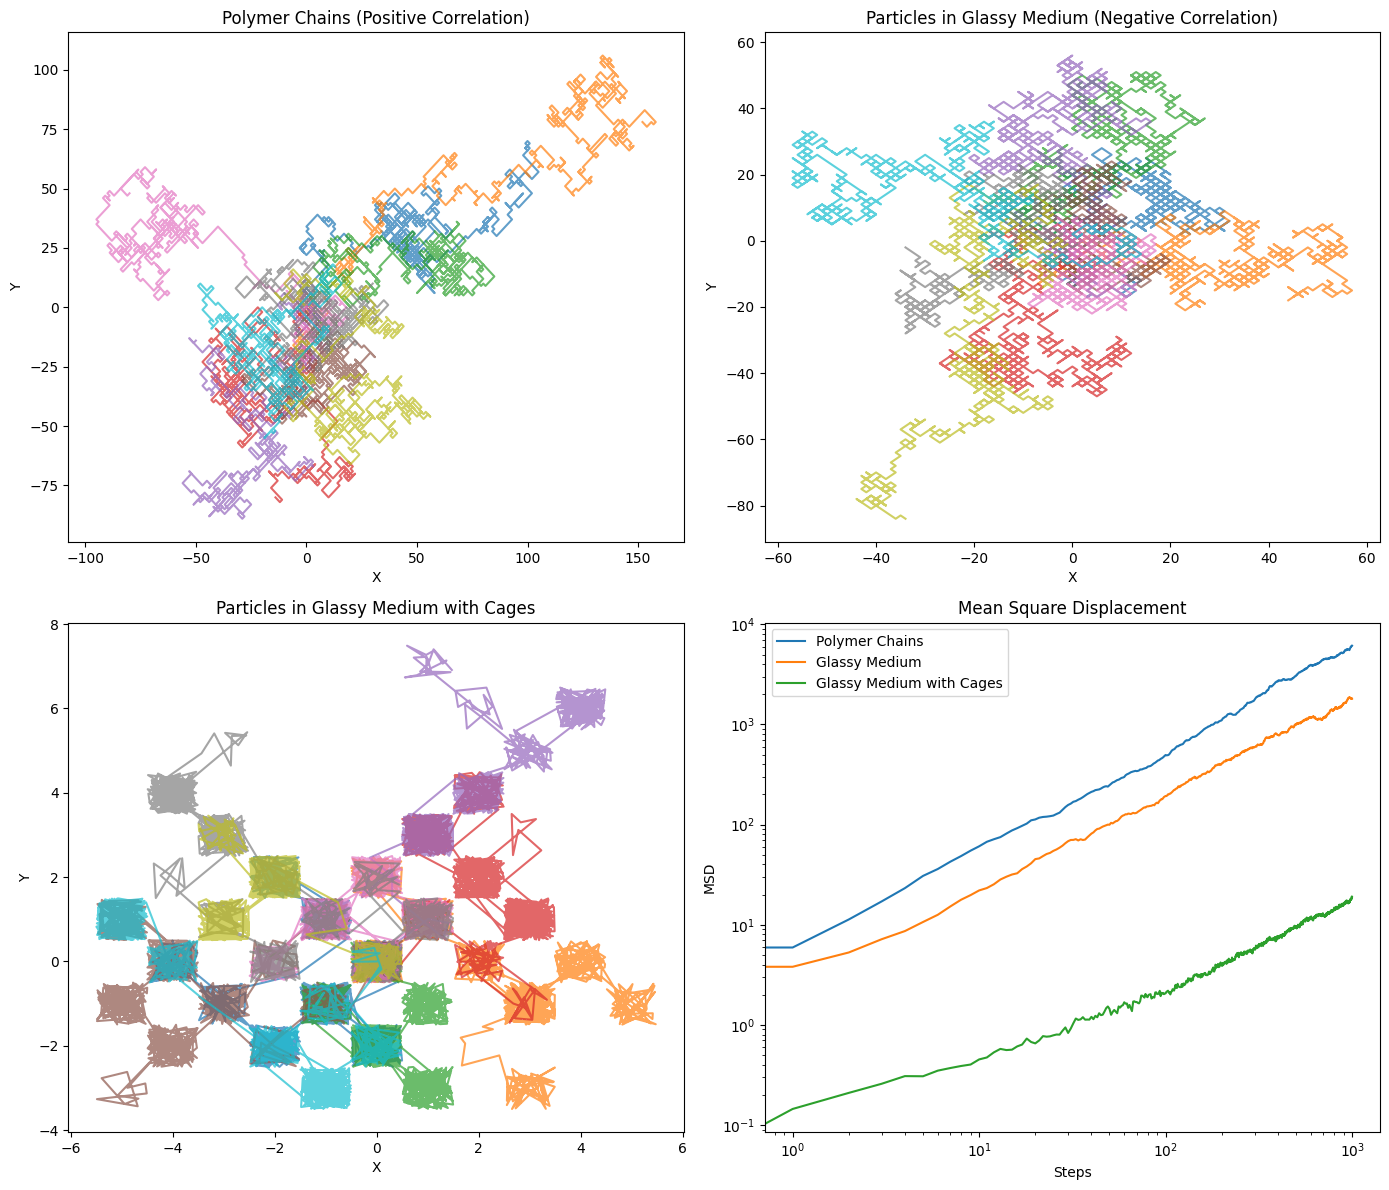

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate a correlated random walk
def correlated_random_walk(n_steps, correlation, p=0.5, dimension=1):
    steps = np.random.choice([-1, 1], size=(n_steps, dimension), p=[p, 1-p])
    for i in range(1, n_steps):
        for j in range(dimension):
            if np.random.rand() < correlation:
                steps[i, j] = steps[i-1, j]
    return np.cumsum(steps, axis=0)

# Function to simulate a glassy medium
def simulate_glassy_medium(n_steps, cage_size, escape_prob, correlation=-0.3):
    position = np.zeros((n_steps, 2))
    cage_position = np.zeros(2)
    last_step = np.zeros(2)

    for i in range(1, n_steps):
        if np.random.rand() < escape_prob:
            cage_position += np.random.choice([-cage_size, cage_size], size=2)
        
        # Negatively correlated step within the cage
        step = np.random.uniform(-cage_size/2, cage_size/2, size=2)
        if np.random.rand() < abs(correlation):
            step = -np.sign(correlation) * last_step
        
        position[i] = cage_position + step
        last_step = step

    return position

# Simulation parameters
n_steps = 1000
n_walks = 100

# Simulate polymer chain (positive correlation in 2D)
polymer_chains = [correlated_random_walk(n_steps, correlation=0.5, dimension=2) for _ in range(n_walks)]

# Simulate particles in glassy medium (negative correlation in 2D)
glassy_particles = [correlated_random_walk(n_steps, correlation=-0.3, dimension=2) for _ in range(n_walks)]

# Simulate glassy medium with cages
glassy_cages = [simulate_glassy_medium(n_steps, cage_size=1.0, escape_prob=0.01) for _ in range(n_walks)]

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Polymer Chains
for walk in polymer_chains[:10]:
    axs[0, 0].plot(walk[:, 0], walk[:, 1], alpha=0.7)
axs[0, 0].set_title('Polymer Chains (Positive Correlation)')
axs[0, 0].set_xlabel('X')
axs[0, 0].set_ylabel('Y')

# Particles in Glassy Medium
for walk in glassy_particles[:10]:
    axs[0, 1].plot(walk[:, 0], walk[:, 1], alpha=0.7)
axs[0, 1].set_title('Particles in Glassy Medium (Negative Correlation)')
axs[0, 1].set_xlabel('X')
axs[0, 1].set_ylabel('Y')

# Particles in Glassy Medium with Cages
for walk in glassy_cages[:10]:
    axs[1, 0].plot(walk[:, 0], walk[:, 1], alpha=0.7)
axs[1, 0].set_title('Particles in Glassy Medium with Cages')
axs[1, 0].set_xlabel('X')
axs[1, 0].set_ylabel('Y')

# Mean Square Displacement
def calculate_msd(walks):
    msd = np.zeros(n_steps)
    for walk in walks:
        msd += np.sum(walk**2, axis=1)
    return msd / len(walks)

msd_polymer = calculate_msd(polymer_chains)
msd_glassy = calculate_msd(glassy_particles)
msd_cages = calculate_msd(glassy_cages)

axs[1, 1].loglog(msd_polymer, label='Polymer Chains')
axs[1, 1].loglog(msd_glassy, label='Glassy Medium')
axs[1, 1].loglog(msd_cages, label='Glassy Medium with Cages')
axs[1, 1].set_title('Mean Square Displacement')
axs[1, 1].set_xlabel('Steps')
axs[1, 1].set_ylabel('MSD')
axs[1, 1].legend()

plt.tight_layout()
plt.show()


# 3D Quantum Walk Simulation: Theory and Implementation



## Theoretical Background

### Quantum Walks

Quantum walks are the quantum mechanical analogue of classical random walks. In our simulation, particles' positions are described by a quantum superposition of states on a discrete 3D grid. This allows each particle to explore multiple paths simultaneously, potentially leading to different propagation characteristics compared to classical random walks.

### Multi-Particle Systems

Our simulation involves multiple quantum particles (default is 2). In quantum mechanics, a multi-particle system's state is described by a wavefunction in a higher-dimensional Hilbert space. The dimensionality of this space grows exponentially with the number of particles, which is reflected in our Hamiltonian construction.

### Hamiltonian and Time Evolution

The Hamiltonian operator, describing the system's total energy, is central to our quantum simulation. Our Hamiltonian includes:

1. Kinetic energy terms (nearest-neighbor hopping in a tight-binding approximation)
2. Potential energy from a custom molecular potential
3. Inter-particle interactions
4. An external time-dependent field simulating an applied electromagnetic field

The time evolution of the quantum state is governed by the Schrödinger equation:

$$ i\hbar \frac{\partial \psi}{\partial t} = H\psi $$

where $\psi$ is the wavefunction, $t$ is time, $\hbar$ is the reduced Planck's constant (set to 1 in our units), and $H$ is the Hamiltonian operator.

### Decoherence

We include a simple decoherence term to model the quantum system's interaction with its environment. This causes the quantum superposition to decay over time, gradually transitioning the system from quantum to classical behavior.

## Implementation Details

### Spatial Discretization

The 3D space is discretized into a cubic grid (default size 5x5x5), with each grid point representing a possible particle position.

### Hamiltonian Construction

The Hamiltonian is constructed as a sparse matrix (`scipy.sparse.csr_matrix`) for computational efficiency. It incorporates:

- Kinetic energy: -1 for nearest-neighbor couplings
- Potential energy: Custom molecular potential (Lennard-Jones type)
- Inter-particle interactions: Constant interaction strength between particles
- Time-dependent external field: Applied along the x-direction

### Custom Molecular Potential

We use a Lennard-Jones type potential to model the interaction between quantum particles and a simple molecular structure (e.g., a water molecule). This captures both short-range repulsion and long-range attraction:

$$ V(r) = 4\epsilon \left[ \left(\frac{\sigma}{r}\right)^{12} - \left(\frac{\sigma}{r}\right)^6 \right] $$

where $\epsilon$ and $\sigma$ are parameters depending on the atom type.

### Time Evolution

Time evolution is computed using SciPy's `solve_ivp` function, which implements adaptive step-size integration methods for ordinary differential equations (ODEs). The quantum walk is formulated as an ODE in the Schrödinger picture.

### Performance Optimization

Numba's just-in-time compilation (`@numba.jit`) is used to accelerate computationally intensive functions, particularly the potential calculation.

### Initial State

The initial state is set as Gaussian wave packets for each particle, centered in the grid.

## Expected Results

The simulation generates two main visualizations:

1. **Final Particle Densities**: 3D scatter plots showing each particle's probability distribution at the end of the simulation.

2. **Total Density Evolution**: A 2D plot depicting the total particle density's evolution over time for a middle slice of the 3D space.

## Theoretical Predictions

1. **Non-uniform distributions**: Influenced by the molecular potential and inter-particle interactions.
2. **Interference patterns**: Characteristic of quantum behavior.
3. **Oscillations**: Due to the time-dependent external field.
4. **Decoherence effects**: Gradual transition towards more uniform distribution over time.


# **Simulation with Decoherence rate = 0**



C:\Users\luigi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\sparse\_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\luigi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\sparse\_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


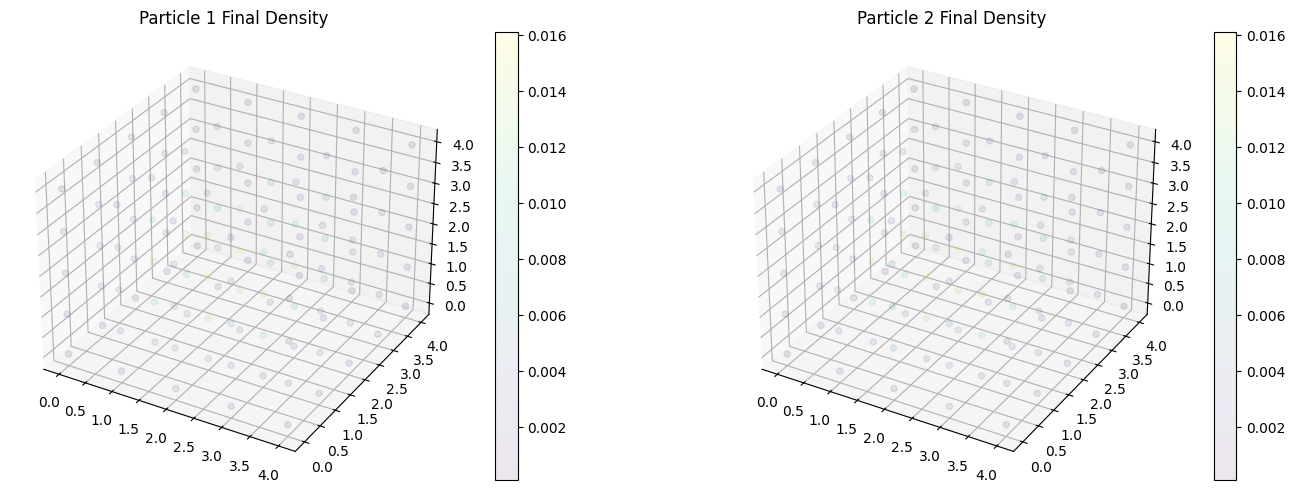

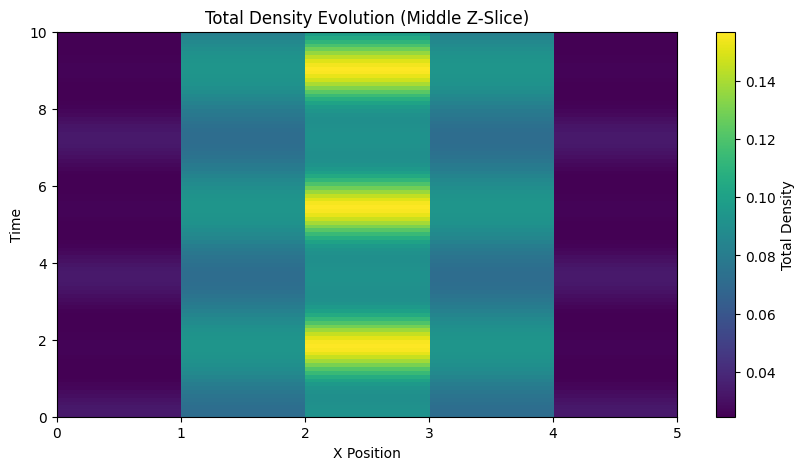

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp
from scipy.sparse import csr_matrix
import numba

@numba.jit(nopython=True)
def custom_potential(x, y, z, molecule_positions, atom_types):
    """
    Custom potential function for a molecular environment.
    Uses a simple Lennard-Jones potential for demonstration.
    """
    potential = 0
    epsilon_0 = 1e-10  # Small constant to prevent division by zero
    for pos, atom_type in zip(molecule_positions, atom_types):
        r_squared = (x - pos[0])**2 + (y - pos[1])**2 + (z - pos[2])**2
        r = np.sqrt(r_squared + epsilon_0)  # Add small constant to prevent division by zero
        if atom_type == 'C':
            epsilon, sigma = 0.1, 3.4  # Example parameters for carbon
        elif atom_type == 'O':
            epsilon, sigma = 0.2, 3.0  # Example parameters for oxygen
        else:
            epsilon, sigma = 0.05, 2.5  # Default parameters
        potential += 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)
    return potential

@numba.jit(nopython=True)
def external_field(x, y, z, t, E0, omega):
    """
    Time-dependent external electric field.
    """
    return E0 * np.sin(omega * t) * x  # Field along x-direction

class AdvancedQuantumWalk3D:
    def __init__(self, grid_size, num_particles, interaction_strength, potential_function, 
                 decoherence_rate, external_field_function):
        self.grid_size = grid_size
        self.num_particles = num_particles
        self.interaction_strength = interaction_strength
        self.potential_function = potential_function
        self.decoherence_rate = decoherence_rate
        self.external_field_function = external_field_function
        self.hilbert_space_size = grid_size ** 3
        self.hamiltonian = self._create_hamiltonian()

    def _create_hamiltonian(self):
        total_size = self.hilbert_space_size * self.num_particles
        H = csr_matrix((total_size, total_size), dtype=complex)
        
        for p in range(self.num_particles):
            offset = p * self.hilbert_space_size
            for i in range(self.grid_size):
                for j in range(self.grid_size):
                    for k in range(self.grid_size):
                        idx = offset + i * self.grid_size**2 + j * self.grid_size + k
                        
                        # Kinetic energy terms (nearest-neighbor hopping)
                        for di, dj, dk in [(1,0,0), (-1,0,0), (0,1,0), (0,-1,0), (0,0,1), (0,0,-1)]:
                            if 0 <= i+di < self.grid_size and 0 <= j+dj < self.grid_size and 0 <= k+dk < self.grid_size:
                                idx_neighbor = offset + (i+di) * self.grid_size**2 + (j+dj) * self.grid_size + (k+dk)
                                H[idx, idx_neighbor] = H[idx_neighbor, idx] = -1

                        # Potential energy term
                        H[idx, idx] += self.potential_function(i, j, k)

        # Inter-particle interaction terms
        for p1 in range(self.num_particles):
            for p2 in range(p1+1, self.num_particles):
                offset1 = p1 * self.hilbert_space_size
                offset2 = p2 * self.hilbert_space_size
                for i in range(self.hilbert_space_size):
                    H[offset1+i, offset2+i] = H[offset2+i, offset1+i] = self.interaction_strength

        return H

    def evolve(self, initial_state, t):
        def quantum_walk_ode(t, y):
            H_t = self.hamiltonian.copy()
            
            # Add time-dependent external field
            for p in range(self.num_particles):
                offset = p * self.hilbert_space_size
                for i in range(self.grid_size):
                    for j in range(self.grid_size):
                        for k in range(self.grid_size):
                            idx = offset + i * self.grid_size**2 + j * self.grid_size + k
                            H_t[idx, idx] += self.external_field_function(i, j, k, t)
            
            dy = -1j * (H_t.dot(y))
            
            # Add decoherence effects
            dy -= self.decoherence_rate * y
            
            return dy

        solution = solve_ivp(quantum_walk_ode, (t[0], t[-1]), initial_state, t_eval=t, method='RK45')
        return solution.y.T

# Simulation parameters
grid_size = 5  
num_particles = 2  
interaction_strength = 1.0
t_max = 10  
num_steps = 100  
decoherence_rate = 0.0
E0 = 0.5
omega = 2.0


# Define molecular structure (example: water molecule)
molecule_positions = np.array([(10, 10, 10), (11, 10, 11), (9, 10, 11)])  # Centered in the grid
atom_types = ['O', 'H', 'H']

# Create quantum walk object
qw = AdvancedQuantumWalk3D(
    grid_size, 
    num_particles, 
    interaction_strength, 
    lambda x, y, z: custom_potential(x, y, z, molecule_positions, atom_types),
    decoherence_rate,
    lambda x, y, z, t: external_field(x, y, z, t, E0, omega)
)

# Create initial state (Gaussian wave packets for each particle)
initial_state = np.zeros(qw.hilbert_space_size * num_particles, dtype=complex)
for p in range(num_particles):
    for i in range(grid_size):
        for j in range(grid_size):
            for k in range(grid_size):
                idx = p * qw.hilbert_space_size + i * grid_size**2 + j * grid_size + k
                initial_state[idx] = np.exp(-((i-grid_size//2)**2 + (j-grid_size//2)**2 + (k-grid_size//2)**2) / (2*2**2))
initial_state /= np.linalg.norm(initial_state)

# Evolve the system
t = np.linspace(0, t_max, num_steps)
solution = qw.evolve(initial_state, t)

# Calculate particle densities over time
particle_densities = np.zeros((num_particles, grid_size, grid_size, grid_size, num_steps))
for step in range(num_steps):
    state = solution[step]
    for p in range(num_particles):
        offset = p * qw.hilbert_space_size
        particle_state = state[offset:offset+qw.hilbert_space_size]
        particle_densities[p, :, :, :, step] = np.abs(particle_state.reshape(grid_size, grid_size, grid_size))**2

# Visualize results
fig = plt.figure(figsize=(15, 5))

for p in range(num_particles):
    ax = fig.add_subplot(1, num_particles, p+1, projection='3d')
    x, y, z = np.meshgrid(np.arange(grid_size), np.arange(grid_size), np.arange(grid_size))
    scatter = ax.scatter(x, y, z, c=particle_densities[p, :, :, :, -1].flatten(), cmap='viridis', alpha=0.1)
    ax.set_title(f'Particle {p+1} Final Density')
    plt.colorbar(scatter)

plt.tight_layout()
plt.show()

# Plot total density over time for a slice
plt.figure(figsize=(10, 5))
total_density = np.sum(particle_densities, axis=0)
plt.imshow(total_density[:, :, grid_size//2, :].sum(axis=0).T, aspect='auto', origin='lower', 
           extent=[0, grid_size, 0, t_max], cmap='viridis')
plt.colorbar(label='Total Density')
plt.title('Total Density Evolution (Middle Z-Slice)')
plt.xlabel('X Position')
plt.ylabel('Time')
plt.show()

### Total Density Evolution (Middle Z-Slice)

The plot visualizes the time evolution of the total quantum density at a middle Z-slice of a 3D grid, demonstrating the effects of particle interactions, external fields, and potential landscapes on quantum walk dynamics. Initially localized densities spread and evolve under the influence of a custom potential modeled after a molecular structure and an external sinusoidal electric field. The bright central regions indicate areas of high particle density, which evolve due to the interplay between the kinetic motion (quantum walk) and external influences. 
